In [1]:
import glob
import pickle

In [2]:
# 2
f2s = []
for f2 in glob.glob('path_repair_tweets-tweets_sample_params_2*.pkl'):
    print(f2)
    f2s.append(f2)
print('\n')

# 4 
f4s = []
for f4 in glob.glob('path_repair_tweets-tweets_sample_params_4*.pkl')[-3:]:
    f4s.append(f4)
print('\n')

# 6
f6s = []
for f6 in glob.glob('path_repair_tweets-tweets_sample_params_6*.pkl'):
    print(f6)
    f6s.append(f6)
print('\n')

# 8
f8s = []
for f8 in glob.glob('path_repair_tweets-tweets_sample_params_8*.pkl'):
    print(f8)
    f8s.append(f8)
print('\n')

# 10
f10s = []
for f10 in glob.glob('path_repair_tweets-tweets_sample_params_10*.pkl')[-2:]:
    print(f10)
    f10s.append(f10)
f10s.append('')
print('\n')

path_repair_tweets-tweets_sample_params_2-0.7-0.8-0.8-1-20241017_075210.pkl
path_repair_tweets-tweets_sample_params_2-0.7-0.8-0.8-1-20241017_075221.pkl
path_repair_tweets-tweets_sample_params_2-0.7-0.8-0.8-1-20241017_075230.pkl




path_repair_tweets-tweets_sample_params_6-0.7-0.8-0.8-1-20241017_145259.pkl
path_repair_tweets-tweets_sample_params_6-0.7-0.8-0.8-1-20241017_145312.pkl
path_repair_tweets-tweets_sample_params_6-0.7-0.8-0.8-1-20241017_145502.pkl


path_repair_tweets-tweets_sample_params_8-0.7-0.8-0.8-1-20241017_145927.pkl
path_repair_tweets-tweets_sample_params_8-0.7-0.8-0.8-1-20241017_145940.pkl
path_repair_tweets-tweets_sample_params_8-0.7-0.8-0.8-1-20241017_151701.pkl


path_repair_tweets-tweets_sample_params_10-0.7-0.8-0.8-1-20241017_134041.pkl
path_repair_tweets-tweets_sample_params_10-0.7-0.8-0.8-1-20241017_134058.pkl




In [3]:
strats = ['greedy', 'information_gain', 'brute_force']


In [4]:
fs_with_strats = {}

In [5]:
for fs in [f2s, f4s, f6s, f8s, f10s]:
    for f,s in zip(fs,strats):
        fs_with_strats[f]=s

In [6]:
fs_with_strats

{'path_repair_tweets-tweets_sample_params_2-0.7-0.8-0.8-1-20241017_075210.pkl': 'greedy',
 'path_repair_tweets-tweets_sample_params_2-0.7-0.8-0.8-1-20241017_075221.pkl': 'information_gain',
 'path_repair_tweets-tweets_sample_params_2-0.7-0.8-0.8-1-20241017_075230.pkl': 'brute_force',
 'path_repair_tweets-tweets_sample_params_4-0.7-0.8-0.8-1-20241017_143249.pkl': 'greedy',
 'path_repair_tweets-tweets_sample_params_4-0.7-0.8-0.8-1-20241017_143301.pkl': 'information_gain',
 'path_repair_tweets-tweets_sample_params_4-0.7-0.8-0.8-1-20241017_143313.pkl': 'brute_force',
 'path_repair_tweets-tweets_sample_params_6-0.7-0.8-0.8-1-20241017_145259.pkl': 'greedy',
 'path_repair_tweets-tweets_sample_params_6-0.7-0.8-0.8-1-20241017_145312.pkl': 'information_gain',
 'path_repair_tweets-tweets_sample_params_6-0.7-0.8-0.8-1-20241017_145502.pkl': 'brute_force',
 'path_repair_tweets-tweets_sample_params_8-0.7-0.8-0.8-1-20241017_145927.pkl': 'greedy',
 'path_repair_tweets-tweets_sample_params_8-0.7-0.8-0.8

In [7]:
dfs = []

In [8]:
import pandas as pd

In [9]:
for f in fs_with_strats:
    if(f):
        with open(f, 'rb') as x:
            res_f = pickle.load(x)
            print(f)
            print(res_f['summary'])
            
            print('\n')
            df_f = pd.DataFrame([res_f['summary']])
            df_f['avg_tree_size'] = sum([m['rule'].size for m in res_f['fix_details'].values()]) / len(res_f['fix_details'])
            df_f['strat']=fs_with_strats[f]
            display(df_f)

            dfs.append(df_f)

path_repair_tweets-tweets_sample_params_2-0.7-0.8-0.8-1-20241017_075210.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 2, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 1.0, 'complain_fix_rate': 1.0, 'new_global_accuracy': 0.5652666434297665, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.5652666434297665, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 4.580155611038208, 'snorkel_run_after_fix': 5.232860803604126, 'solver_runtime': 0.09067845344543457, 'repair_time': 0.00856161117553711}, 'optimal_objective_value': 23.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,2,0.7,0.8,0.8,tweets,1,1.0,1.0,0.565267,0.593085,0.565267,10528,11476,"{'snorkel_first_run': 4.580155611038208, 'snor...",23.0,6.125,greedy


path_repair_tweets-tweets_sample_params_2-0.7-0.8-0.8-1-20241017_075221.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 2, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 1.0, 'complain_fix_rate': 1.0, 'new_global_accuracy': 0.5652666434297665, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.5652666434297665, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 5.427846431732178, 'snorkel_run_after_fix': 5.4023356437683105, 'solver_runtime': 0.0915689468383789, 'repair_time': 0.010684013366699219}, 'optimal_objective_value': 23.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,2,0.7,0.8,0.8,tweets,1,1.0,1.0,0.565267,0.593085,0.565267,10528,11476,"{'snorkel_first_run': 5.427846431732178, 'snor...",23.0,5.875,information_gain


path_repair_tweets-tweets_sample_params_2-0.7-0.8-0.8-1-20241017_075230.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 2, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 1.0, 'complain_fix_rate': 0.0, 'new_global_accuracy': 0.5738933426280934, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.5738933426280934, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 4.003216505050659, 'snorkel_run_after_fix': 5.066155195236206, 'solver_runtime': 0.09241700172424316, 'repair_time': 0.03608846664428711}, 'optimal_objective_value': 23.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,2,0.7,0.8,0.8,tweets,1,1.0,0.0,0.573893,0.593085,0.573893,10528,11476,"{'snorkel_first_run': 4.003216505050659, 'snor...",23.0,5.375,brute_force


path_repair_tweets-tweets_sample_params_4-0.7-0.8-0.8-1-20241017_143249.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 4, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 1.0, 'complain_fix_rate': 0.0, 'new_global_accuracy': 0.46897873823631925, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.46897873823631925, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 4.4744977951049805, 'snorkel_run_after_fix': 6.739092826843262, 'solver_runtime': 0.28319621086120605, 'repair_time': 0.01575446128845215}, 'optimal_objective_value': 43.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,4,0.7,0.8,0.8,tweets,1,1.0,0.0,0.468979,0.593085,0.468979,10528,11476,"{'snorkel_first_run': 4.4744977951049805, 'sno...",43.0,8.125,greedy


path_repair_tweets-tweets_sample_params_4-0.7-0.8-0.8-1-20241017_143301.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 4, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 0.5, 'complain_fix_rate': 1.0, 'new_global_accuracy': 0.41826420355524574, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.41826420355524574, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 4.341078996658325, 'snorkel_run_after_fix': 6.490573883056641, 'solver_runtime': 0.279998779296875, 'repair_time': 0.037400245666503906}, 'optimal_objective_value': 43.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,4,0.7,0.8,0.8,tweets,1,0.5,1.0,0.418264,0.593085,0.418264,10528,11476,"{'snorkel_first_run': 4.341078996658325, 'snor...",43.0,6.875,information_gain


path_repair_tweets-tweets_sample_params_4-0.7-0.8-0.8-1-20241017_143313.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 4, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 0.5, 'complain_fix_rate': 1.0, 'new_global_accuracy': 0.41826420355524574, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.41826420355524574, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 4.189564228057861, 'snorkel_run_after_fix': 6.545918703079224, 'solver_runtime': 0.2817990779876709, 'repair_time': 0.9724836349487305}, 'optimal_objective_value': 43.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,4,0.7,0.8,0.8,tweets,1,0.5,1.0,0.418264,0.593085,0.418264,10528,11476,"{'snorkel_first_run': 4.189564228057861, 'snor...",43.0,6.875,brute_force


path_repair_tweets-tweets_sample_params_6-0.7-0.8-0.8-1-20241017_145259.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 6, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 1.0, 'complain_fix_rate': 0.6666666666666666, 'new_global_accuracy': 0.5413907284768212, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.5413907284768212, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 5.571043491363525, 'snorkel_run_after_fix': 10.308227300643921, 'solver_runtime': 0.35349464416503906, 'repair_time': 0.0239865779876709}, 'optimal_objective_value': 64.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,6,0.7,0.8,0.8,tweets,1,1.0,0.666667,0.541391,0.593085,0.541391,10528,11476,"{'snorkel_first_run': 5.571043491363525, 'snor...",64.0,11.125,greedy


path_repair_tweets-tweets_sample_params_6-0.7-0.8-0.8-1-20241017_145312.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 6, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 1.0, 'complain_fix_rate': 1.0, 'new_global_accuracy': 0.47525270128964797, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.47525270128964797, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 5.405680418014526, 'snorkel_run_after_fix': 6.862836122512817, 'solver_runtime': 0.34709787368774414, 'repair_time': 0.072906494140625}, 'optimal_objective_value': 64.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,6,0.7,0.8,0.8,tweets,1,1.0,1.0,0.475253,0.593085,0.475253,10528,11476,"{'snorkel_first_run': 5.405680418014526, 'snor...",64.0,7.75,information_gain


path_repair_tweets-tweets_sample_params_6-0.7-0.8-0.8-1-20241017_145502.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 6, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 0.6666666666666666, 'complain_fix_rate': 1.0, 'new_global_accuracy': 0.6906587661205995, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.6906587661205995, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 3.9920389652252197, 'snorkel_run_after_fix': 12.572159051895142, 'solver_runtime': 0.34011244773864746, 'repair_time': 92.83843350410461}, 'optimal_objective_value': 64.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,6,0.7,0.8,0.8,tweets,1,0.666667,1.0,0.690659,0.593085,0.690659,10528,11476,"{'snorkel_first_run': 3.9920389652252197, 'sno...",64.0,7.75,brute_force


path_repair_tweets-tweets_sample_params_8-0.7-0.8-0.8-1-20241017_145927.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 8, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 1.0, 'complain_fix_rate': 0.75, 'new_global_accuracy': 0.5770303241547577, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.5770303241547577, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 4.507023096084595, 'snorkel_run_after_fix': 10.444350242614746, 'solver_runtime': 0.5846071243286133, 'repair_time': 0.034847259521484375}, 'optimal_objective_value': 87.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,8,0.7,0.8,0.8,tweets,1,1.0,0.75,0.57703,0.593085,0.57703,10528,11476,"{'snorkel_first_run': 4.507023096084595, 'snor...",87.0,14.75,greedy


path_repair_tweets-tweets_sample_params_8-0.7-0.8-0.8-1-20241017_145940.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 8, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 1.0, 'complain_fix_rate': 1.0, 'new_global_accuracy': 0.7005054025792959, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.7005054025792959, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 4.1178576946258545, 'snorkel_run_after_fix': 7.8044891357421875, 'solver_runtime': 0.594642162322998, 'repair_time': 0.135589599609375}, 'optimal_objective_value': 87.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,8,0.7,0.8,0.8,tweets,1,1.0,1.0,0.700505,0.593085,0.700505,10528,11476,"{'snorkel_first_run': 4.1178576946258545, 'sno...",87.0,9.375,information_gain


path_repair_tweets-tweets_sample_params_8-0.7-0.8-0.8-1-20241017_151701.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 8, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 0.75, 'complain_fix_rate': 1.0, 'new_global_accuracy': 0.6704426629487626, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.6704426629487626, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 4.3080315589904785, 'snorkel_run_after_fix': 7.645177364349365, 'solver_runtime': 0.589777946472168, 'repair_time': 1029.0727903842926}, 'optimal_objective_value': 87.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,8,0.7,0.8,0.8,tweets,1,0.75,1.0,0.670443,0.593085,0.670443,10528,11476,"{'snorkel_first_run': 4.3080315589904785, 'sno...",87.0,8.875,brute_force


path_repair_tweets-tweets_sample_params_10-0.7-0.8-0.8-1-20241017_134041.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 10, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 1.0, 'complain_fix_rate': 0.6, 'new_global_accuracy': 0.6602474729871035, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.6602474729871035, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 4.393285751342773, 'snorkel_run_after_fix': 12.052054166793823, 'solver_runtime': 2.788346529006958, 'repair_time': 0.043235063552856445}, 'optimal_objective_value': 111.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,10,0.7,0.8,0.8,tweets,1,1.0,0.6,0.660247,0.593085,0.660247,10528,11476,"{'snorkel_first_run': 4.393285751342773, 'snor...",111.0,17.75,greedy


path_repair_tweets-tweets_sample_params_10-0.7-0.8-0.8-1-20241017_134058.pkl
{'before_fix_global_accuracy': 0.5440920181247821, 'user_input_size': 10, 'lf_acc_thresh': 0.7, 'instance_acc_thresh': 0.8, 'min_non_abstain_thresh': 0.8, 'dataset_name': 'tweets', 'random_state': 1, 'confirm_prev_rate': 0.4, 'complain_fix_rate': 0.6, 'new_global_accuracy': 0.5470547228999652, 'global_accuracy_on_valid_data': 0.5930851063829787, 'new_global_accuracy_on_valid': 0.5470547228999652, 'valid_global_data_size': 10528, 'new_valid_global_data_size': 11476, 'runtimes': {'snorkel_first_run': 4.433809280395508, 'snorkel_run_after_fix': 8.913968086242676, 'solver_runtime': 2.784726858139038, 'repair_time': 0.2196669578552246}, 'optimal_objective_value': 111.0}




,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,10,0.7,0.8,0.8,tweets,1,0.4,0.6,0.547055,0.593085,0.547055,10528,11476,"{'snorkel_first_run': 4.433809280395508, 'snor...",111.0,11.25,information_gain


In [10]:
df_res = pd.concat(dfs).reset_index(drop=True)

In [11]:
df_res

,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,global_accuracy_on_valid_data,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,runtimes,optimal_objective_value,avg_tree_size,strat
0,0.544092,2,0.7,0.8,0.8,tweets,1,1.000000,1.000000,0.565267,0.593085,0.565267,10528,11476,"{'snorkel_first_run': 4.580155611038208, 'snor...",23.0,6.125,greedy
1,0.544092,2,0.7,0.8,0.8,tweets,1,1.000000,1.000000,0.565267,0.593085,0.565267,10528,11476,"{'snorkel_first_run': 5.427846431732178, 'snor...",23.0,5.875,information_gain
2,0.544092,2,0.7,0.8,0.8,tweets,1,1.000000,0.000000,0.573893,0.593085,0.573893,10528,11476,"{'snorkel_first_run': 4.003216505050659, 'snor...",23.0,5.375,brute_force
3,0.544092,4,0.7,0.8,0.8,tweets,1,1.000000,0.000000,0.468979,0.593085,0.468979,10528,11476,"{'snorkel_first_run': 4.4744977951049805, 'sno...",43.0,8.125,greedy
4,0.544092,4,0.7,0.8,0.8,tweets,1,0.500000,1.000000,0.418264,0.593085,0.418264,10528,11476,"{'snorkel_first_run': 4.341078996658325, 'snor...",43.0,6.875,information_gain
5,0.544092,4,0.7,0.8,0.8,tweets,1,0.500000,1.000000,0.418264,0.593085,0.418264,10528,11476,"{'snorkel_first_run': 4.189564228057861, 'snor...",43.0,6.875,brute_force
6,0.544092,6,0.7,0.8,0.8,tweets,1,1.000000,0.666667,0.541391,0.593085,0.541391,10528,11476,"{'snorkel_first_run': 5.571043491363525, 'snor...",64.0,11.125,greedy
7,0.544092,6,0.7,0.8,0.8,tweets,1,1.000000,1.000000,0.475253,0.593085,0.475253,10528,11476,"{'snorkel_first_run': 5.405680418014526, 'snor...",64.0,7.750,information_gain
8,0.544092,6,0.7,0.8,0.8,tweets,1,0.666667,1.000000,0.690659,0.593085,0.690659,10528,11476,"{'snorkel_first_run': 3.9920389652252197, 'sno...",64.0,7.750,brute_force
9,0.544092,8,0.7,0.8,0.8,tweets,1,1.000000,0.750000,0.577030,0.593085,0.577030,10528,11476,"{'snorkel_first_run': 4.507023096084595, 'snor...",87.0,14.750,greedy


In [12]:
df_expanded = pd.json_normalize(df_res['runtimes'])

# Join the expanded columns back to the original DataFrame (excluding the original dictionary column)
df_res = df_res.drop(columns=['runtimes']).join(df_expanded)

In [13]:
df_res

,before_fix_global_accuracy,user_input_size,lf_acc_thresh,instance_acc_thresh,min_non_abstain_thresh,dataset_name,random_state,confirm_prev_rate,complain_fix_rate,new_global_accuracy,...,new_global_accuracy_on_valid,valid_global_data_size,new_valid_global_data_size,optimal_objective_value,avg_tree_size,strat,snorkel_first_run,snorkel_run_after_fix,solver_runtime,repair_time
0,0.544092,2,0.7,0.8,0.8,tweets,1,1.000000,1.000000,0.565267,...,0.565267,10528,11476,23.0,6.125,greedy,4.580156,5.232861,0.090678,0.008562
1,0.544092,2,0.7,0.8,0.8,tweets,1,1.000000,1.000000,0.565267,...,0.565267,10528,11476,23.0,5.875,information_gain,5.427846,5.402336,0.091569,0.010684
2,0.544092,2,0.7,0.8,0.8,tweets,1,1.000000,0.000000,0.573893,...,0.573893,10528,11476,23.0,5.375,brute_force,4.003217,5.066155,0.092417,0.036088
3,0.544092,4,0.7,0.8,0.8,tweets,1,1.000000,0.000000,0.468979,...,0.468979,10528,11476,43.0,8.125,greedy,4.474498,6.739093,0.283196,0.015754
4,0.544092,4,0.7,0.8,0.8,tweets,1,0.500000,1.000000,0.418264,...,0.418264,10528,11476,43.0,6.875,information_gain,4.341079,6.490574,0.279999,0.037400
5,0.544092,4,0.7,0.8,0.8,tweets,1,0.500000,1.000000,0.418264,...,0.418264,10528,11476,43.0,6.875,brute_force,4.189564,6.545919,0.281799,0.972484
6,0.544092,6,0.7,0.8,0.8,tweets,1,1.000000,0.666667,0.541391,...,0.541391,10528,11476,64.0,11.125,greedy,5.571043,10.308227,0.353495,0.023987
7,0.544092,6,0.7,0.8,0.8,tweets,1,1.000000,1.000000,0.475253,...,0.475253,10528,11476,64.0,7.750,information_gain,5.405680,6.862836,0.347098,0.072906
8,0.544092,6,0.7,0.8,0.8,tweets,1,0.666667,1.000000,0.690659,...,0.690659,10528,11476,64.0,7.750,brute_force,3.992039,12.572159,0.340112,92.838434
9,0.544092,8,0.7,0.8,0.8,tweets,1,1.000000,0.750000,0.577030,...,0.577030,10528,11476,87.0,14.750,greedy,4.507023,10.444350,0.584607,0.034847


In [15]:
# df_res.to_csv('three_strat_comparison.csv', index=False)

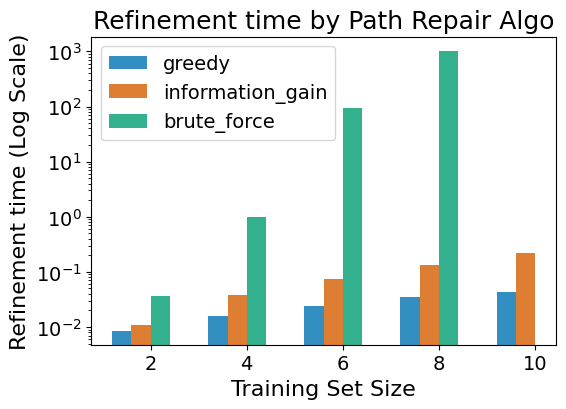

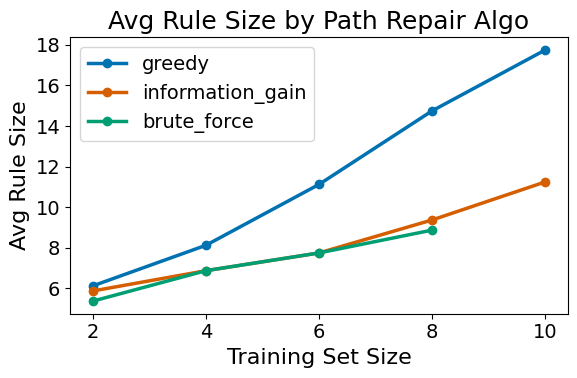

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = df_res

df_filtered = df[['user_input_size', 'strat', 'repair_time', 'avg_tree_size']].copy()

colorblind_colors = ['#0072B2', '#D55E00', '#009E73', '#CC79A7', '#F0E442', '#56B4E9']

fig, ax1 = plt.subplots(figsize=(6, 4))

n_strats = len(df_filtered['strat'].unique())
bar_width = 0.4  
plt.rcParams.update({'font.size': 14})

for i, strat in enumerate(df_filtered['strat'].unique()):
    data = df_filtered[df_filtered['strat'] == strat]
    positions = data['user_input_size'] + (i - n_strats / 2) * bar_width
    ax1.bar(positions, data['repair_time'], width=bar_width, label=f'{strat}', color=colorblind_colors[i], alpha=0.8)

ax1.set_yscale('log')

ax1.set_xlabel('Training Set Size', fontsize=16)
ax1.set_ylabel('Refinement time (Log Scale)', fontsize=16)
ax1.set_title('Refinement time by Path Repair Algo', fontsize=18)
ax1.legend(fontsize=14)

fig.savefig('three_strat_repair_time_plot.png', dpi=300, bbox_inches='tight')

fig, ax2 = plt.subplots(figsize=(6, 4))

for i, strat in enumerate(df_filtered['strat'].unique()):
    data = df_filtered[df_filtered['strat'] == strat]
    ax2.plot(data['user_input_size'], data['avg_tree_size'], label=f'{strat}', marker='o', linestyle='-', color=colorblind_colors[i], linewidth=2.5)

ax2.set_xlabel('Training Set Size', fontsize=16)
ax2.set_ylabel('Avg Rule Size', fontsize=16)
ax2.set_title('Avg Rule Size by Path Repair Algo', fontsize=18)
ax2.legend(fontsize=14)

fig.savefig('three_strat_avg_rule_size_plot.png', dpi=300, bbox_inches='tight')



plt.tight_layout()
plt.show()




